In [240]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import csv
import pandas
import copy
import random

In [172]:
csvfile = open('0.csv')
file_data = pandas.read_csv(csvfile, header=None)

In [222]:
file_data

,0,1,2,3,4
0,2.406640,1.0,2.569265,1.134234,0.009986
1,3.579147,1.0,1.817105,1.008626,0.009992
2,2.076401,1.0,9.596029,4.560576,0.009950
3,2.801457,1.0,7.617839,3.754187,0.009961
4,4.049240,1.0,7.622255,4.005385,0.009964
5,5.330127,1.0,5.145334,3.119443,0.009980
6,29.179641,1.0,5.182616,9.126426,0.010039
7,2.558586,1.0,6.678984,3.211991,0.009965
8,29.993368,1.0,5.908428,9.667707,0.010038
9,17.700366,1.0,4.041164,5.650604,0.010016


In [223]:
data = np.array(pandas.DataFrame.as_matrix(file_data))  # преобразовываем данные в матрицу

In [243]:
X = np.array(data[:, 1:])

In [244]:
X

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.81710485,  1.00862595,  0.00999217],
       [ 1.        ,  9.59602944,  4.56057615,  0.00994965],
       ..., 
       [ 1.        ,  9.13992001,  5.39132986,  0.00996256],
       [ 1.        ,  0.35879715,  3.85757563,  0.01003507],
       [ 1.        ,  6.46188344,  4.50522306,  0.00998042]])

In [245]:
Y = np.array(data[:, 1])

In [227]:
def get_est(X, Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)),np.transpose(X)), Y)

In [228]:
theta_lin_regr = get_est(X, Y)
theta_lin_regr

array([  9.99999978e-01,  -8.69476935e-10,  -7.14862836e-10,
        -2.20537186e-05])

In [229]:
def get_est_2(X):
    return np.linalg.det(np.dot(X.transpose(), X))

In [230]:
theta_det = get_est_2(X)
theta_det

0.67743983619219761

In [231]:
def theta(X, Y, lam):
    s = np.dot(X.transpose(), X)
    return np.dot(np.dot(np.linalg.inv(s + lam * np.eye(len(s))), X.transpose()), Y)

In [232]:
theta(X, Y, 1.5)

array([  9.89546064e-01,   8.74634029e-04,   9.20921954e-04,
         9.89545257e-03])

In [233]:
grid = np.arange(0, 100, 1)

In [234]:
def mat_with_deleted_row(X, i):
    new_x = X
    return np.delete(new_x, i, 0)

In [257]:
grid = np.arange(0, 100, 0.1)

In [286]:
sigmas = []
temp = []
for lam in grid:
    for i in range(len(X)):
        old_col = X[i].copy()
        X[i] = np.array([0, 0, 0, 0])
        coefs.append(theta(X, Y, lam))
        X[i] = old_col    
    sigmas.append(np.var(np.array(temp)))
    temp = []

In [287]:
sigmas = np.array(sigmas)

In [288]:
def draw_plot(i, yl):
    plt.figure(figsize=(15,9))
    plt.plot(grid, sigma[:, i])
    plt.ylim(0, yl)
    plt.show()

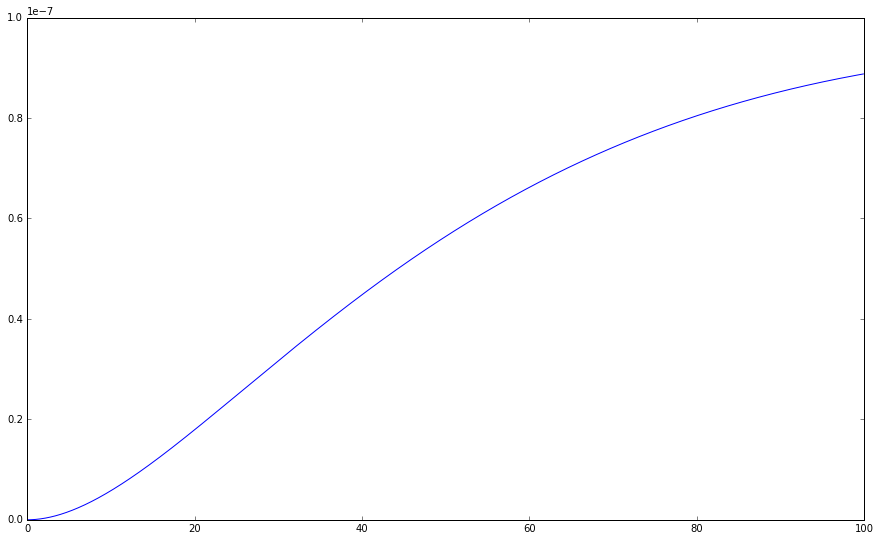

In [289]:
draw_plot(0, 0.0000001)

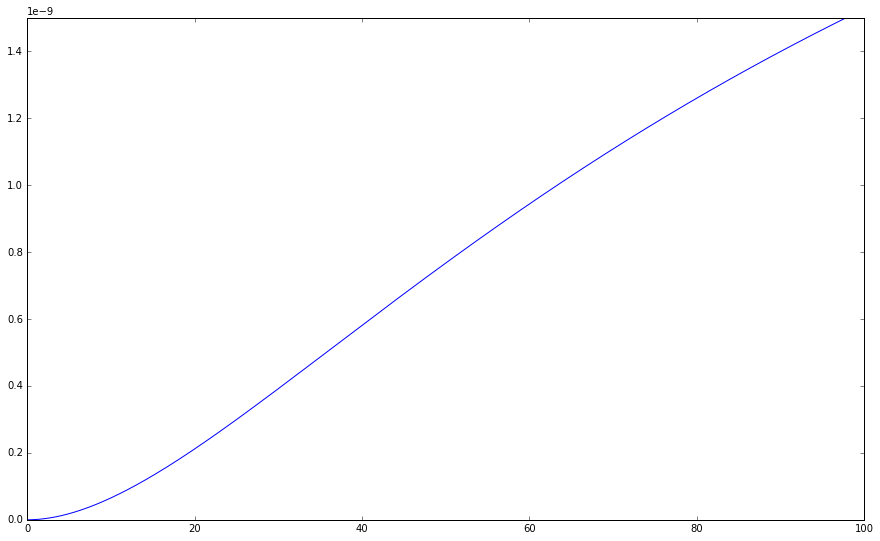

In [290]:
draw_plot(1, 0.0000000015)

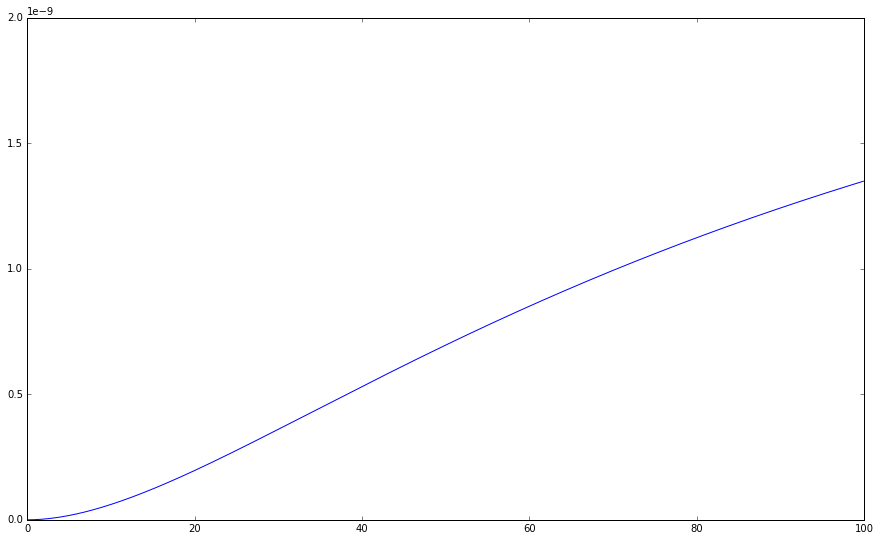

In [291]:
draw_plot(2, 0.000000002)

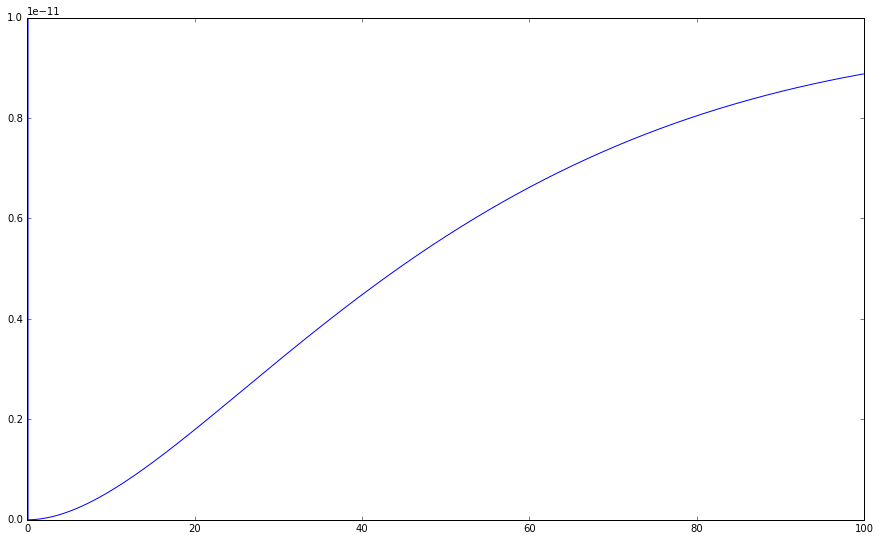

In [292]:
draw_plot(3, 0.00000000001)

In [281]:
np.argmin(sigma[:, 0])

1